# Global Shark Attack Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Global-Shark-Attack-Analysis" data-toc-modified-id="Global-Shark-Attack-Analysis-0">Global Shark Attack Analysis</a></span></li><li><span><a href="#Import-all-Required-Libraries" data-toc-modified-id="Import-all-Required-Libraries-1">Import all Required Libraries</a></span></li><li><span><a href="#Import-Data-Sets" data-toc-modified-id="Import-Data-Sets-2">Import Data Sets</a></span></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-3">Exploring the Data</a></span><ul class="toc-item"><li><span><a href="#General-Data-Set-Exploration" data-toc-modified-id="General-Data-Set-Exploration-3.1">General Data Set Exploration</a></span></li><li><span><a href="#Exploration-by-Columns" data-toc-modified-id="Exploration-by-Columns-3.2">Exploration by Columns</a></span></li></ul></li><li><span><a href="#Cleaning-&amp;-Formatting-the-Data" data-toc-modified-id="Cleaning-&amp;-Formatting-the-Data-4">Cleaning &amp; Formatting the Data</a></span><ul class="toc-item"><li><span><a href="#Hypotheses" data-toc-modified-id="Hypotheses-4.1">Hypotheses</a></span></li><li><span><a href="#Selecting-Columns" data-toc-modified-id="Selecting-Columns-4.2">Selecting Columns</a></span></li><li><span><a href="#Eliminating-Registers" data-toc-modified-id="Eliminating-Registers-4.3">Eliminating Registers</a></span></li><li><span><a href="#Formatting-Columns" data-toc-modified-id="Formatting-Columns-4.4">Formatting Columns</a></span></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-5">Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Univariate-Graphs" data-toc-modified-id="Univariate-Graphs-5.1">Univariate Graphs</a></span></li><li><span><a href="#Bivariate-Graphs" data-toc-modified-id="Bivariate-Graphs-5.2">Bivariate Graphs</a></span></li><li><span><a href="#Interactive-World-Maps" data-toc-modified-id="Interactive-World-Maps-5.3">Interactive World Maps</a></span></li></ul></li></ul></div>

# Import all Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import regex as re
import folium
from folium.plugins import MarkerCluster
from datetime import date, datetime
import src
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Import Data Sets

In [2]:
attacks = pd.read_csv('attacks.csv', encoding='cp1252')
coord = pd.read_csv('countries_codes_and_coordinates.csv', delimiter='"')

# Exploring the Data

## General Data Set Exploration

This first exploration consists in analyzing which information is contained in the dataset imported. 

In [3]:
#Overview of the data
attacks.head()

Case Number         Date    Year        Type    Country             Area  \
0  2018.06.25  25-Jun-2018  2018.0     Boating        USA       California   
1  2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2  2018.06.09  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3  2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex   ...  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe    F  ...   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely     F  ...   
2                    Habush, Oahu      Surfing      John Denges    M  ...   
3              Arrawarra Headland      Surfing             male    M  ...   
4                        La Ticla  Free diving   Gustavo Ramos     M  ...   

          Species           Investigator or Source                       pdf  \
0      White shark                R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1              NaN  K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2              NaN  K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3        2 m shark                  B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4  Tiger shark, 3m                       A .Kipper      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.18   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.09   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.08   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.04   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0    2018.06.25         6303.0         NaN         NaN  
1    2018.06.18         6302.0         NaN         NaN  
2    2018.06.09         6301.0         NaN         NaN  
3    2018.06.08         6300.0         NaN         NaN  
4    2018.06.04         6299.0         NaN         NaN  

[5 rows x 24 columns]

In [4]:
#Describe all variables
attacks.describe(include='all')

Case Number  Date         Year        Type Country     Area  \
count         8702  6302  6300.000000        6298    6252     5847   
unique        6287  5433          NaN           8     212      825   
top              0  1957          NaN  Unprovoked     USA  Florida   
freq          2400    11          NaN        4595    2229     1037   
mean           NaN   NaN  1927.272381         NaN     NaN      NaN   
std            NaN   NaN   281.116308         NaN     NaN      NaN   
min            NaN   NaN     0.000000         NaN     NaN      NaN   
25%            NaN   NaN  1942.000000         NaN     NaN      NaN   
50%            NaN   NaN  1977.000000         NaN     NaN      NaN   
75%            NaN   NaN  2005.000000         NaN     NaN      NaN   
max            NaN   NaN  2018.000000         NaN     NaN      NaN   

                                Location Activity  Name  Sex   ...  \
count                               5762     5758  6092  5737  ...   
unique                              4108     1532  5230     6  ...   
top     New Smyrna Beach, Volusia County  Surfing  male     M  ...   
freq                                 163      971   550  5094  ...   
mean                                 NaN      NaN   NaN   NaN  ...   
std                                  NaN      NaN   NaN   NaN  ...   
min                                  NaN      NaN   NaN   NaN  ...   
25%                                  NaN      NaN   NaN   NaN  ...   
50%                                  NaN      NaN   NaN   NaN  ...   
75%                                  NaN      NaN   NaN   NaN  ...   
max                                  NaN      NaN   NaN   NaN  ...   

           Species  Investigator or Source                            pdf  \
count          3464                   6285                           6302   
unique         1549                   4969                           6291   
top     White shark         C. Moore, GSAF  1923.00.00.a-NJ fisherman.pdf   
freq            163                    105                              2   
mean            NaN                    NaN                            NaN   
std             NaN                    NaN                            NaN   
min             NaN                    NaN                            NaN   
25%             NaN                    NaN                            NaN   
50%             NaN                    NaN                            NaN   
75%             NaN                    NaN                            NaN   
max             NaN                    NaN                            NaN   

                                             href formula  \
count                                                6301   
unique                                               6290   
top     http://sharkattackfile.net/spreadsheets/pdf_di...   
freq                                                    2   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                     href Case Number.1  \
count                                                6302          6302   
unique                                               6285          6285   
top     http://sharkattackfile.net/spreadsheets/pdf_di...  1920.00.00.b   
freq                                                    4             2   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN          

## Exploration by Columns

In this section we will use some EDA tecniques to plot and analyze some of the columns that we consider most relevant for our analysis. This first exploration will also help us to visualize data grouped by variables, identify outliers, etc. As result, we will have a general overview of the data's distribution, being able to filter the scope in which we want to focus our analysis.

<AxesSubplot:xlabel='Year'>

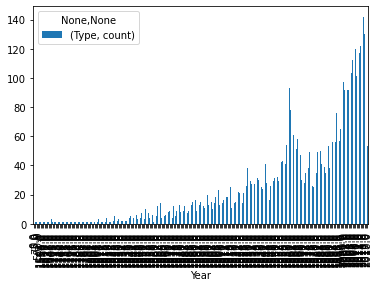

In [5]:
# Registers by Year 
attacks.groupby('Year').agg({'Type': ['count']}).plot.bar()

(1950.0, 2020.0)

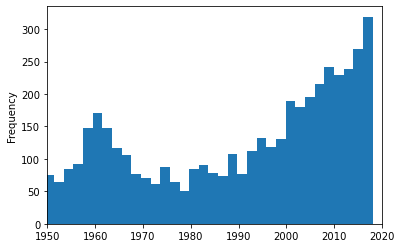

In [6]:
# Registers by Year (1950-2020)
attacks['Year'].plot.hist(bins=1000)
plt.xlim(1950,2020)

In [7]:
# Activities Frequency
attacks['Activity'].value_counts()

Surfing                                   971
Swimming                                  869
Fishing                                   431
Spearfishing                              333
Bathing                                   162
                                         ... 
Playing with a frisbee in the shallows      1
Sinking of the ferryboat Dumaguete          1
Wreck of the Storm King                     1
Feeding mullet to sharks                    1
Wreck of  large double sailing canoe        1
Name: Activity, Length: 1532, dtype: int64

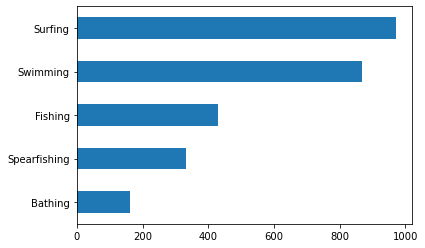

In [8]:
# Top 5 Activities frequency
attacks['Activity'].value_counts().head().plot.barh().invert_yaxis()

In [9]:
#Shark attacks by Type of event preview
attacks.groupby('Type').agg({'Type':['count']})

Type
             count
Type              
Boat           137
Boating        203
Boatomg          1
Invalid        547
Provoked       574
Questionable     2
Sea Disaster   239
Unprovoked    4595

# Cleaning & Formatting the Data 



## Hypotheses

After examining the data in the previous section we have decided to clean the data based on the following criteria:
- Keep the columns that are relevant to our study (Case Number, Date, Year, Type, Country, Activity, Sex, Species)
- We will focus the analysis on the data registered after 1950 
- Eliminate registers with empty/ not valid data

- After cleaning the data according to the above criteria, we will:
    - Describe each variable
    - Analyze which factors may contribute to the fatility rate of shark attacks
    - Analyze the information by country

## Selecting Columns

In [10]:
# Drop the columns that are not relevant to our study
attacks = attacks.drop(columns=['Location', 'Date', 'Time', 'Name', 'pdf', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Area', 'Injury', 'Investigator or Source', 'href formula', 'href'], axis = 1)

## Eliminating Registers

In [11]:
#Eliminate registers containing all null values
attacks.dropna(how='all', inplace = True)

#Eliminate registers from before 1950
attacks = attacks[attacks['Year'] >= 1950]

#The registers that are not considered attacks are eliminated
attacks = attacks[attacks['Type'] != 'Invalid']

#The resulting data frame has a total of 4120 registers and 9 columns
print(attacks.shape)
attacks.head()

(4120, 9)


Case Number    Year        Type    Country      Activity Sex   Age  \
0    2018.06.25  2018.0     Boating        USA      Paddling    F   57   
1    2018.06.18  2018.0  Unprovoked        USA      Standing    F   11   
3    2018.06.08  2018.0  Unprovoked  AUSTRALIA       Surfing    M  NaN   
4    2018.06.04  2018.0    Provoked     MEXICO   Free diving    M  NaN   
5  2018.06.03.b  2018.0  Unprovoked  AUSTRALIA  Kite surfing    M  NaN   

  Fatal (Y/N)         Species   
0           N      White shark  
1           N              NaN  
3           N        2 m shark  
4           N  Tiger shark, 3m  
5           N              NaN

In [12]:
# After eliminating the unnecessary data we will check how many nulls per column we have as follows:
attacks.isnull().sum(axis=0)

Case Number       0
Year              0
Type              2
Country          11
Activity        253
Sex             350
Age            1298
Fatal (Y/N)       9
Species        1588
dtype: int64

## Formatting Columns

In order to interpretate and analyze the data correctly, we need to format the data to have standardized type of data and meaning.

In [13]:
# Formatting Column Names

#Eliminating blank spaces after the column names
attacks.columns = map(str.strip, list(attacks.columns))

# Change Case Number column name to Case_Number
attacks = attacks.rename(columns={'Case Number':'Case_Number'})

attacks.columns

Index(['Case_Number', 'Year', 'Type', 'Country', 'Activity', 'Sex', 'Age',
       'Fatal (Y/N)', 'Species'],
      dtype='object')

In [14]:
# Converting Case Number to Datetime
attacks['Case_Number'] = src.format_case_number(attacks['Case_Number'])

In [15]:
# Extracting Month from Case Number to get the 'Season' in a further step
attacks['Month'] = src.get_month('Case_Number', attacks)

In [16]:
# Formatting Year
attacks['Year'] = src.format_year(attacks['Year'])

In [17]:
# Formatting Type
attacks['Type'] = src.format_type(attacks['Type'])

In [18]:
# Formatting Country
attacks['Country'] = src.format_country(attacks['Country'])

In [19]:
# Getting the Country Code in Alpha-2 format (ISO 3166)
attacks['Country_Code'] = src.get_country_codes(attacks['Country'])

In [20]:
# Getting Country Coodinates to get the 'Season' in a further step
coord = pd.read_csv('countries_codes_and_coordinates.csv', delimiter='"')
coord = coord[['Alpha-2 code', 'Latitude (average)', 'Longitude (average)']]
coord.columns = ['Country_Code', 'Latitude', 'Longitude']
attacks = pd.merge(attacks, coord, on=['Country_Code'], how = 'inner')

In [21]:
# Getting Season
attacks['Season'] = src.get_season(attacks['Month'], attacks['Latitude'])

In [22]:
# Formatting Activity
src.format_activity('Activity', attacks)

In [23]:
# Formatting Sex
src.format_sex('Sex', attacks)

In [24]:
# Formatting Age
attacks['Age'] = src.format_age(attacks['Age'])

In [25]:
# Formatting Fatality Column
src.format_fatal('Fatal (Y/N)', attacks)

In [26]:
# Formatting Species
attacks['Species'] = src.format_species('Species', attacks)

In [27]:
#Visualizing resulting data frame
#The final data frame has a total of 4050 registers and 14 columns
print(attacks.shape)
attacks

(4050, 14)


Case_Number  Year        Type        Country       Activity Sex   Age  \
0     2018-06-25  2018  Watercraft  UNITED STATES  rowing sports   F  57.0   
1     2018-06-18  2018  Unprovoked  UNITED STATES         wading   F  11.0   
2     2018-05-27  2018  Unprovoked  UNITED STATES        fishing   M  52.0   
3     2018-05-26  2018  Unprovoked  UNITED STATES         wading   M  15.0   
4     2018-05-26  2018  Unprovoked  UNITED STATES         wading   M  12.0   
...          ...   ...         ...            ...            ...  ..   ...   
4045  1954-00-00  1954  Unprovoked     MARTINIQUE            NaN   M   NaN   
4046  1952-03-30  1952  Unprovoked    NETHERLANDS            NaN   M   NaN   
4047  1952-00-00  1952  Unprovoked        LIBERIA     snorkeling   M   NaN   
4048  1950-00-00  1950  Unprovoked        LIBERIA            NaN   M   NaN   
4049  1950-08-00  1950  Unprovoked   SAUDI ARABIA     snorkeling   M   NaN   

     Fatal (Y/N)      Species  Month Country_Code  Latitude  Longitude  Season  
0              N  white shark      6           US   38.0000     -97.00  Spring  
1              N          NaN      6           US   38.0000     -97.00  Spring  
2              N  lemon shark      5           US   38.0000     -97.00  Spring  
3              N   bull shark      5           US   38.0000     -97.00  Spring  
4              N          NaN      5           US   38.0000     -97.00  Spring  
...          ...          ...    ...          ...       ...        ...     ...  
4045           N  nurse shark      0           MQ   14.6667     -61.00     NaN  
4046           N   bull shark      3           NL   52.5000       5.75  Winter  
4047           Y          NaN      0           LR    6.5000      -9.50     NaN  
4048           Y          NaN      0           LR    6.5000      -9.50     NaN  
4049           N          NaN      8           SA   25.0000      45.00  Summer  

[4050 rows x 14 columns]

In [28]:
# Exporting  the clean data set as 'attacks_clean.csv'
attacks.to_csv('attacks_clean.csv', index = False)

# Data Visualization

In this section we will plot our variables in order to extract meaningful insights about the data and to present it in a visual manner.

## Univariate Graphs

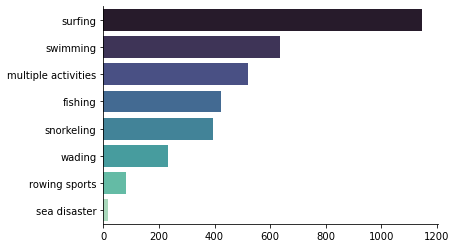

In [29]:
# Total number of Attacks by Activity
sns.barplot(y = attacks['Activity'].value_counts().index, x = attacks['Activity'].value_counts().values, palette='mako')
sns.despine()

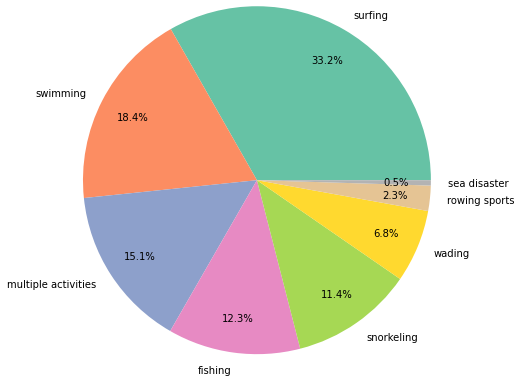

In [30]:
# Percentage Attacks by Activity
palette_color = sns.color_palette('Set2')
plt.pie(attacks['Activity'].value_counts().values, 
        labels = attacks['Activity'].value_counts().index, 
        colors=palette_color, 
        pctdistance=0.8,
        autopct='%.1f%%',
        radius=2,
       )
sns.despine()

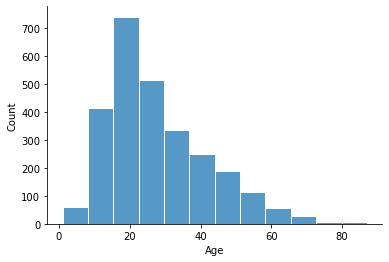

In [31]:
#Attacks by Age Histogram
sns.histplot(attacks['Age'], bins=12, edgecolor='white')
sns.despine()

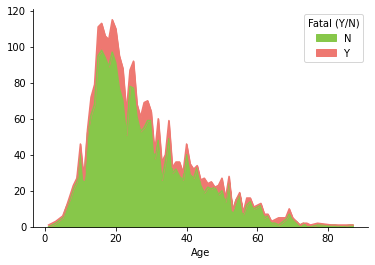

In [32]:
#Fatality by Age
fatal_age = pd.crosstab(index=attacks['Age'], 
                            columns=attacks['Fatal (Y/N)'])

fatal_age.plot.area(color=['#87C74A', '#EE7871'])
sns.despine()

In [33]:
#% Attacks on different age groups
perc_15_25 = int(round(len(attacks[(attacks['Age']>=15) & (attacks['Age']<=25)])/len(attacks[(attacks['Age']>0)]),2)*100)
perc_10_30 = int(round(len(attacks[(attacks['Age']>=10) & (attacks['Age']<=30)])/len(attacks[(attacks['Age']>0)]),2)*100)
print(f'% of attacks in people between 15 and 25 years: {perc_15_25} %')
print(f'% of attacks in people between 10 and 30 years: {perc_10_30} %')

% of attacks in people between 15 and 25 years: 40 %
% of attacks in people between 10 and 30 years: 63 %


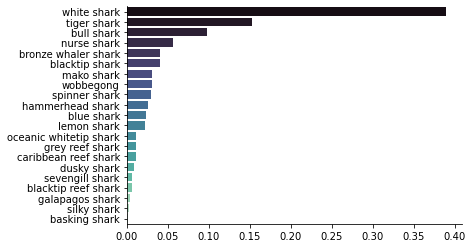

In [34]:
# Attacks by Shark
sns.barplot(y = attacks['Species'].value_counts().index, x = attacks['Species'].value_counts(normalize=True).values, palette='mako')
sns.despine()

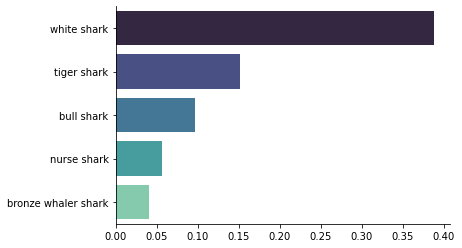

In [35]:
# top 5 attacks by shark species 
sns.barplot(y = attacks['Species'].value_counts(normalize=True).head().index, x = attacks['Species'].value_counts(normalize=True).head().values, palette='mako')
sns.despine()

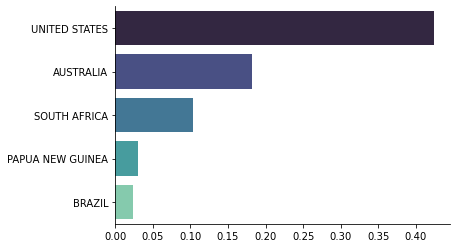

In [36]:
# Top 5 Countries per shark attacks
sns.barplot(y = attacks['Country'].value_counts().head().index, x = attacks['Country'].value_counts(normalize=True).head().values, palette='mako')
sns.despine()

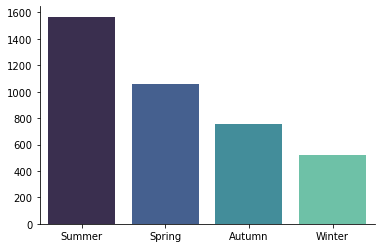

In [37]:
# Total number of Attacks by Season
sns.barplot(x = attacks['Season'].value_counts().head().index, y = attacks['Season'].value_counts().head().values, palette='mako')
sns.despine()

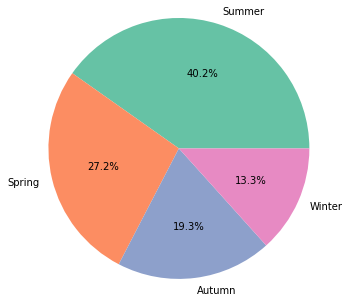

In [38]:
# Percentage Attacks by Season
palette_color = sns.color_palette('Set2')
plt.pie(attacks['Season'].value_counts().values, 
        labels = attacks['Season'].value_counts().index, 
        colors=palette_color, 
        pctdistance=0.6,
        autopct='%.1f%%',
        radius=1.5,
       )
sns.despine()

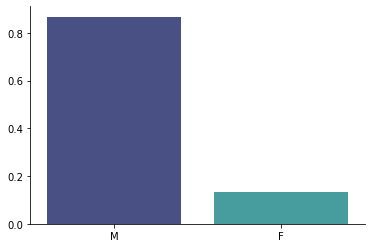

In [39]:
# Total attacks by Sex
sns.barplot(x = attacks['Sex'].value_counts(normalize=True).index, y = attacks['Sex'].value_counts(normalize=True).values, palette='mako')
sns.despine()

In [40]:
#% attacks on men
perc_men = int(round(len(attacks[(attacks['Sex']=='M')])/len(attacks[(attacks['Sex']=='M') | (attacks['Sex']=='F')]),2)*100)
print(f'% of attacks in men is: {perc_men} %')

% of attacks in men is: 87 %


## Bivariate Graphs

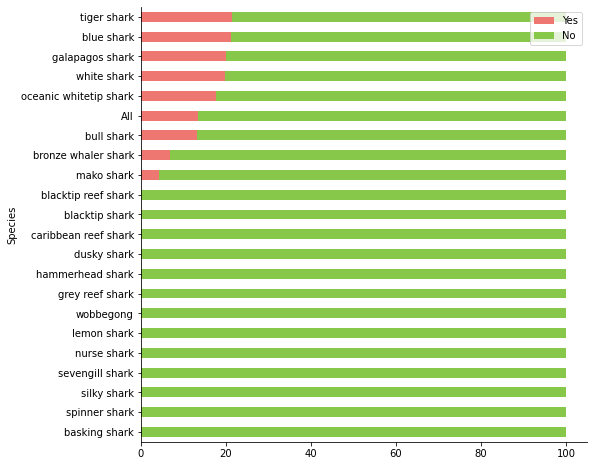

In [41]:
# Percentage Fatality for all Shark Species
fatal_species = pd.crosstab(index=attacks['Species'], 
                            columns=attacks['Fatal (Y/N)'], margins = True, normalize='index')
fatal_species.columns= ["No","Yes"]
fatal_species = fatal_species.sort_values(by=['Yes'], ascending=True)
fatal_species = fatal_species.applymap(lambda x: x*100)
fatal_species[["Yes","No"]].plot.barh(stacked=True, color=['#EE7871', '#87C74A'], figsize=(8,8))
sns.despine()


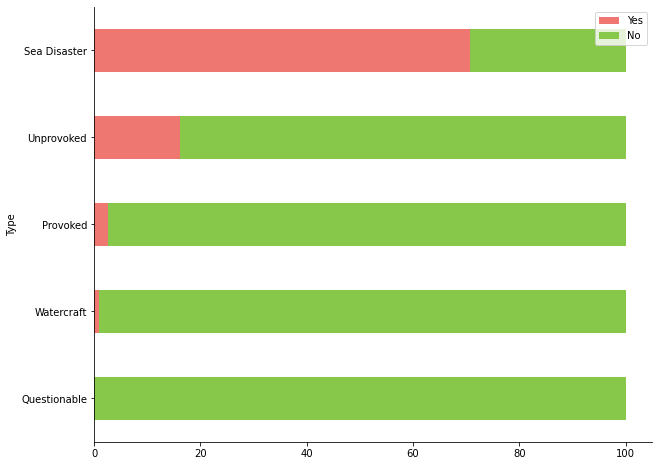

In [42]:
# Percentage Fatality for all Shark Species
fatal_type = pd.crosstab(index=attacks['Type'], 
                            columns=attacks['Fatal (Y/N)'], normalize='index')
fatal_type.columns= ["No","Yes"]
fatal_type = fatal_type.sort_values(by=['Yes'], ascending=True)
fatal_type = fatal_type.applymap(lambda x: x*100)
fatal_type[["Yes","No"]].plot.barh(stacked=True, color=['#EE7871', '#87C74A'], figsize=(10,8))
sns.despine()

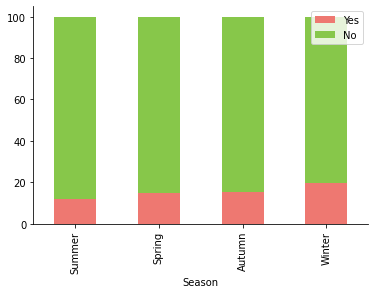

In [43]:
#Fatality per season
fatality_season = pd.crosstab(index=attacks['Season'], 
                            columns=attacks['Fatal (Y/N)'], normalize='index')


fatality_season.columns= ["No","Yes"]
fatality_season = fatality_season.sort_values(by=['Yes'], ascending=True)
fatality_season = fatality_season.applymap(lambda x: x*100)
fatality_season[["Yes","No"]].plot.bar(stacked=True, color=['#EE7871', '#87C74A'])
sns.despine()

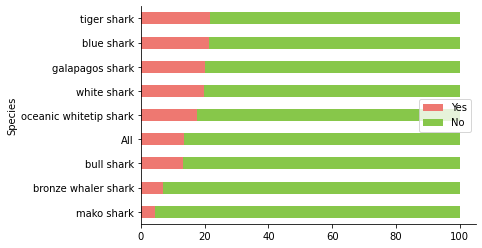

In [44]:
# Percentage Fatality for Shark Species that caused fatalities
fatal_species = fatal_species.sort_values(by=['Yes'], ascending=False)
fatal_species[["Yes","No"]].head(9).sort_values(by='Yes', ascending=True).plot.barh(stacked=True, color=['#EE7871', '#87C74A'])
sns.despine()

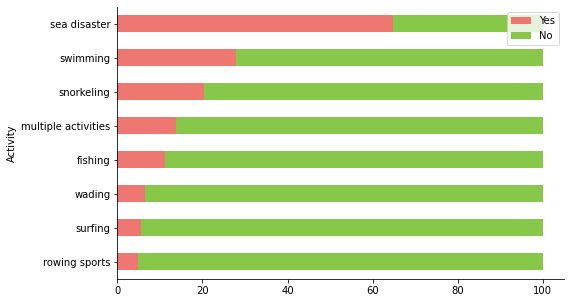

In [45]:
# Percentage of fatality per activity
fatal_activities = pd.crosstab(index=attacks['Activity'], 
                            columns=attacks['Fatal (Y/N)'], normalize='index')
fatal_activities.columns= ["No","Yes"]
fatal_activities = fatal_activities.sort_values(by=['Yes'], ascending=True)
fatal_activities = fatal_activities.applymap(lambda x: x*100)
fatal_activities[["Yes","No"]].plot.barh(stacked=True, color=['#EE7871', '#87C74A'], figsize=(8,5))
sns.despine()

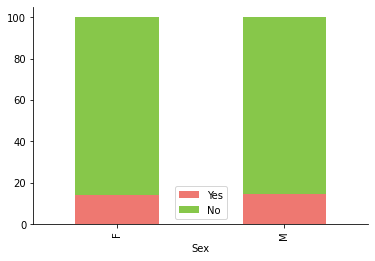

In [46]:
# Fatality by Sex
fatality_sex = pd.crosstab(index=attacks['Sex'], 
                            columns=attacks['Fatal (Y/N)'], normalize='index')


fatality_sex.columns= ["No","Yes"]
fatality_sex = fatality_sex.sort_values(by=['Yes'], ascending=True)
fatality_sex = fatality_sex.applymap(lambda x: x*100)
fatality_sex[["Yes","No"]].plot.bar(stacked=True, color=['#EE7871', '#87C74A'])
sns.despine()

## Interactive World Maps

In [47]:
# Top Shark Species by attack by country 
country_species = pd.crosstab(index=attacks['Species'], columns=attacks['Country_Code'])
country_species


country_top_shark = {}
for i in country_species.columns:
    country_top_shark[i] = country_species[i].sort_values(ascending=False)[:1].index.tolist()

top_shark = pd.DataFrame.from_dict(country_top_shark, orient='index', dtype=None, columns=None).reset_index()
top_shark.columns = ['Country_Code', 'Top_Shark']

In [48]:
# Total number of attacks by country
freq_country = pd.DataFrame(attacks['Country_Code'].value_counts()).reset_index()
freq_country.columns = ['Country_Code', 'Frequency']
freq_country.drop(4, inplace=True)

In [49]:
# Merging the above Data Frames and includinf coordinates for each country
coord = pd.read_csv('countries_codes_and_coordinates.csv', delimiter='"')
coord = coord[['Alpha-2 code', 'Latitude (average)', 'Longitude (average)']]
coord.columns = ['Country_Code', 'Latitude', 'Longitude']
freq_country = pd.merge(freq_country, coord, on=['Country_Code'], how = 'inner')
freq_country = pd.merge(freq_country, top_shark, on=['Country_Code'], how = 'inner')

freq_country.head()

Country_Code  Frequency  Latitude  Longitude    Top_Shark
0           US       1717     38.00      -97.0  white shark
1           AU        734    -27.00      133.0  white shark
2           ZA        417    -29.00       24.0  white shark
3           PG        121     -6.00      147.0  tiger shark
4           BS         88     24.25      -76.0   bull shark

In [50]:
# World map with pop-up information
world_map= folium.Map(tiles="cartodbpositron")

for i in range(len(freq_country)):
        lat_2 = freq_country.iloc[i]['Latitude']
        long_2 = freq_country.iloc[i]['Longitude']
        radius= float(freq_country.iloc[i]['Frequency'])/30
        popup_text = """Country : {}<br>
                    Attacks : {}<br>
                    Top Species: {}<br>"""
        popup_text = popup_text.format(freq_country.iloc[i]['Country_Code'],
                                       freq_country.iloc[i]['Frequency'],
                                       freq_country.iloc[i]['Top_Shark']
                                      )
        tooltip=int(freq_country.iloc[i]['Frequency'])
        folium.CircleMarker(location = [lat_2, long_2], tooltip=tooltip, radius=radius, popup= popup_text, color='#99CC66', fill =True).add_to(world_map)

world_map

In [51]:
# World map with clusters by total number of attacks
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster(show=False).add_to(world_map)

for i in range(len(attacks)):
        lat_2 = attacks.iloc[i]['Latitude']
        long_2 = attacks.iloc[i]['Longitude']
        radius= 2
        popup_text = """Country : {}<br>"""
        popup_text = popup_text.format(attacks.iloc[i]['Country_Code'],
                                       #freq_country.iloc[i]['Frequency'],
                                       #attacks.iloc[i]['Top_Shark']
                                      )
        #tooltip=int(freq_country.iloc[i]['Frequency'])
        folium.CircleMarker(location = [lat_2, long_2], radius=radius, popup= popup_text, color='#99CC66', fill =True).add_to(marker_cluster)

world_map

# Conclusions

After all the the above, we have been able to extract following conclusions:

- Surfing is the sport with the highest number of registered shark attacks (33.2%)
- Despite this, Surfing is in the 7th out of 8 positions of activities that cause fatality.
- Top 3 activities that cause fatalities are: sea disaster, swimming and snorkeling (activities where people do not take additional equipment).
- Following Sea Disaster, unprovoked events are the most common type of event that causes fatality.
- 40% of attacks occur to people between 15 and 25 years old.
- 63% of attacks occur to people between 10 and 30 years old.
- The majority (86.7%) of attacks occur in people of male gender. However, although most attacks are registered in male gender, the % fatality is almost identical for both men and women.
- Only 15% of all shark attacks have been registered to cause fatality.
- The shark species with highest number of attacks is the White shark
- The most dangerous sharks, who attacked the most are: White shark, tiger shark, bull shark, nurse shark, bronze whaler shark. Except nurse shark, all of them caused fatalities.
- 40.2% of the attacks occur in the summer season, followed by 27.2% in the spring season.
- The top 3 countries with most registered shark attacks are: USA, Australia, South Africa.